It is a multiclassification problem . Here we have four different claases of images. 

###impoting libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###importing datasets

In [3]:
train_path = '/content/drive/MyDrive/Cotton Disease/train'
validation_path='/content/drive/MyDrive/Cotton Disease/val'
test_path = '/content/drive/MyDrive/Cotton Disease/test'

In [4]:
IMAGE_SIZE = [224, 224]

###processing vgg and adding some more layers

In [5]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [6]:
#not training the existing weights
for layer in vgg.layers:
  layer.trainable = False

**adding flatten and output layer:**

In [7]:
layer1 = Flatten()(vgg.output)
output_layer = Dense(4, activation='softmax')(layer1)

###model:

In [8]:
model = Model(inputs=vgg.input, outputs=output_layer)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**compiling model:**

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

###preprocessing data

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen= ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
validation_set = validation_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


###fitting model

In [15]:
mf = model.fit(training_set,validation_data=validation_set, epochs=50, steps_per_epoch=len(training_set),validation_steps=len(validation_set))

Epoch 1/50
61/61 [==============================] - 410s 7s/step - loss: 0.7692 - accuracy: 0.7273 - val_loss: 0.2937 - val_accuracy: 0.8933
Epoch 2/50
61/61 [==============================] - 50s 808ms/step - loss: 0.2913 - accuracy: 0.8877 - val_loss: 0.2797 - val_accuracy: 0.8814
Epoch 3/50
61/61 [==============================] - 49s 807ms/step - loss: 0.2351 - accuracy: 0.9113 - val_loss: 0.2419 - val_accuracy: 0.8775
Epoch 4/50
61/61 [==============================] - 50s 823ms/step - loss: 0.1810 - accuracy: 0.9375 - val_loss: 0.2320 - val_accuracy: 0.8972
Epoch 5/50
61/61 [==============================] - 50s 819ms/step - loss: 0.1323 - accuracy: 0.9554 - val_loss: 0.2093 - val_accuracy: 0.9209
Epoch 6/50
61/61 [==============================] - 50s 811ms/step - loss: 0.1710 - accuracy: 0.9416 - val_loss: 0.1831 - val_accuracy: 0.9170
Epoch 7/50
61/61 [==============================] - 50s 821ms/step - loss: 0.1274 - accuracy: 0.9605 - val_loss: 0.1765 - val_accuracy: 0.9209
E

###evaluating the model

In [17]:
val = model.evaluate(test_set)

4/4 [==============================] - 5s 892ms/step - loss: 0.0923 - accuracy: 0.9528


In [18]:
print("test loss: ",val[0])
print("test accuracy: ",val[1])

test loss:  0.09230054169893265
test accuracy:  0.9528301954269409


###Plotting Loss and Accuracy


**Accuracy:**

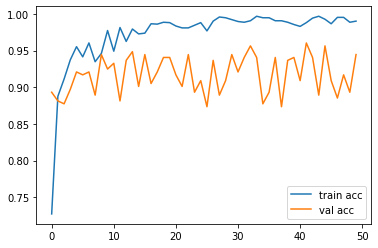

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(mf.history['accuracy'], label='train acc')
plt.plot(mf.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Loss:**

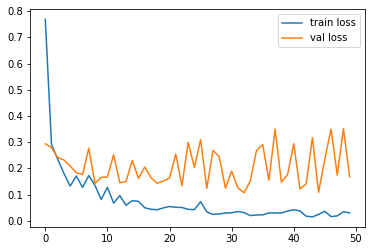

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(mf.history['loss'], label='train loss')
plt.plot(mf.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')